<a href="https://colab.research.google.com/github/AstridG1/Portafolio/blob/main/Fase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('datos.xlsx')

In [ ]:
df.head()

,Número,Fecha (dd/mm/aa),Nombre actividad,Costo,Presupuesto,Tiempo invertido,Tipo,Momento,No. de personas,Unnamed: 9,Datos del estudiante,Unnamed: 11
0,1,19/02/2024,Comida Tec,150.0,300.0,60.0,1.0,2.0,1.0,NaN,Nombre,NaN
1,2,19/02/2024,Gelatina,35.0,50.0,15.0,1.0,3.0,1.0,NaN,Matrícula,NaN
2,3,20/02/2024,Hojas carpeta,70.0,100.0,30.0,5.0,3.0,1.0,NaN,NaN,NaN
3,4,20/02/2024,Sushi,185.0,200.0,130.0,1.0,3.0,2.0,NaN,Descripción de las variables,NaN
4,5,21/02/2024,Uber,90.0,100.0,40.0,6.0,2.0,1.0,NaN,Costo,"Costo total real de realizar la actividad, en ..."


In [ ]:
df = df.iloc[:,3:9]


In [ ]:
df.head()

,Costo,Presupuesto,Tiempo invertido,Tipo,Momento,No. de personas
0,150.0,300.0,60.0,1.0,2.0,1.0
1,35.0,50.0,15.0,1.0,3.0,1.0
2,70.0,100.0,30.0,5.0,3.0,1.0
3,185.0,200.0,130.0,1.0,3.0,2.0
4,90.0,100.0,40.0,6.0,2.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Costo             275 non-null    float64
 1   Presupuesto       275 non-null    float64
 2   Tiempo invertido  275 non-null    float64
 3   Tipo              275 non-null    float64
 4   Momento           275 non-null    float64
 5   No. de personas   275 non-null    float64
dtypes: float64(6)
memory usage: 14.2 KB


In [ ]:
df.isnull().sum()

Costo               25
Presupuesto         25
Tiempo invertido    25
Tipo                25
Momento             25
No. de personas     25
dtype: int64

In [ ]:
df= df.dropna()

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.columns

Index(['Costo', 'Presupuesto', 'Tiempo invertido', 'Tipo', 'Momento',
       'No. de personas'],
      dtype='object')

In [ ]:
x = df[['Presupuesto', 'Tiempo invertido', 'Tipo', 'Momento', 'No. de personas']].values # estas son las variables independientes
y = df['Costo'].values # esta es la variable dependiente

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
y_test

array([ 150.,  220., 2100.,  150.,  150., 1800.,  400.,  120.,  800.,
       1700.,   15.,  120.,  120.,  200.,   25.,  185.,   35.,   70.,
         25.,   20.,  800.,  100., 5000.,  218.,  150.,   25.,   20.,
         70., 2300.,  220.,  200.,   70., 1500.,   18., 2500.,  100.,
        900., 2600., 1500.,  240.,  140., 1200.,  120.,  200.,   20.,
        600.,  250.,   30.,  100.,   25.,  400.,   15., 2300.,  400.,
        120.])

In [ ]:
from sklearn.linear_model import LinearRegression
obj_model_regression = LinearRegression()

In [ ]:
obj_model_regression.fit(x_train, y_train) # aprendizaje automático con base en nuestros datos

LinearRegression()

In [ ]:
x_labels = ['Presupuesto', 'Tiempo invertido', 'Tipo', 'Momento', 'No. de personas']
c_label = ['Coeficientes']

In [ ]:
coeff_df = pd.DataFrame(obj_model_regression.coef_, x_labels, c_label)
coeff_df

,Coeficientes
Presupuesto,0.985340
Tiempo invertido,-0.443141
Tipo,-5.324837
Momento,-37.530419
No. de personas,-2.855783


In [ ]:
y_pred = obj_model_regression.predict(x_test) # realiza la predicción con el modelo generado

In [ ]:
residuals = pd.DataFrame({'Real': y_test, 'Predicción': y_pred, 'Residual': y_test - y_pred})
residuals = residuals.sample(n = 30)
residuals = residuals.sort_values(by='Real')
residuals

,Real,Predicción,Residual
51,15.0,-58.487919,73.487919
44,20.0,-4.300787,24.300787
26,20.0,5.697402,14.302598
18,25.0,10.624103,14.375897
49,25.0,3.481697,21.518303
14,25.0,3.481697,21.518303
25,25.0,10.624103,14.375897
47,30.0,16.046093,13.953907
16,35.0,-11.630925,46.630925
48,100.0,58.665984,41.334016


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9671160189177025

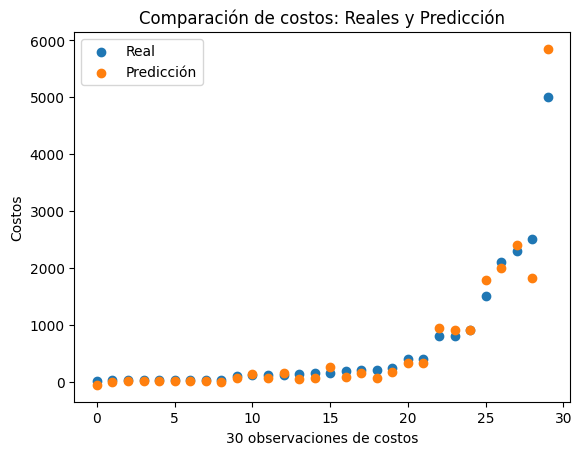

In [ ]:
import matplotlib.pyplot as plt # librería pyplot para graficar
import numpy as np # librería numpy para crear un arreglo de muestra de 30 datos

# función mágica para desplegar el gráfico en nuestra libreta
%matplotlib inline

plt.scatter(np.arange(30), residuals['Real'], label = "Real")  # gráfico con la muestra de datos reales
plt.scatter(np.arange(30), residuals['Predicción'], label = "Predicción")  # gráfico con la muestra de datos de predicción

plt.title("Comparación de costos: Reales y Predicción") # Título

plt.xlabel("30 observaciones de costos") # Eje x

plt.ylabel("Costos") # Eje y

plt.legend(loc='upper left')

plt.show() # mostrar el gráfico

In [ ]:
df.describe()

,Número,Costo,Presupuesto,Tiempo invertido,Tipo,Momento,No. de personas,Unnamed: 9
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,0.0
mean,150.500000,719.916667,783.106667,67.523333,2.726667,1.94000,1.653333,NaN
std,86.746758,1765.645145,1796.936876,94.236003,1.734546,0.71981,1.240275,NaN
min,1.000000,5.000000,7.000000,4.000000,1.000000,1.00000,1.000000,NaN
25%,75.750000,96.000000,100.000000,15.000000,1.000000,1.00000,1.000000,NaN
50%,150.500000,180.000000,200.000000,28.000000,3.000000,2.00000,1.000000,NaN
75%,225.250000,600.000000,800.000000,65.000000,4.000000,2.00000,2.000000,NaN
max,300.000000,13000.000000,13000.000000,400.000000,6.000000,3.00000,5.000000,NaN


In [ ]:
df.loc[df["Costo"].idxmax()]

Número                                                                 92
Fecha (dd/mm/aa)                                      2024-07-02 00:00:00
Nombre actividad                                              Colegiatura
Costo                                                               13000
Presupuesto                                                         13000
Tiempo invertido                                                       10
Tipo                                                                    5
Momento                                                                 2
No. de personas                                                         1
Unnamed: 9                                                            NaN
Datos del estudiante                                      No. de personas
Unnamed: 11             Cantidad de personas involucradas en la activi...
Name: 91, dtype: object

In [ ]:
df.loc[df["Costo"].idxmin()]

Número                              44
Fecha (dd/mm/aa)            28/02/2024
Nombre actividad        Hojas de color
Costo                                5
Presupuesto                          7
Tiempo invertido                     6
Tipo                                 5
Momento                              2
No. de personas                      1
Unnamed: 9                         NaN
Datos del estudiante               NaN
Unnamed: 11                        NaN
Name: 43, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Número                300 non-null    int64  
 1   Fecha (dd/mm/aa)      300 non-null    object 
 2   Nombre actividad      300 non-null    object 
 3   Costo                 300 non-null    int64  
 4   Presupuesto           300 non-null    int64  
 5   Tiempo invertido      300 non-null    int64  
 6   Tipo                  300 non-null    int64  
 7   Momento               300 non-null    int64  
 8   No. de personas       300 non-null    int64  
 9   Unnamed: 9            0 non-null      float64
 10  Datos del estudiante  47 non-null     object 
 11  Unnamed: 11           34 non-null     object 
dtypes: float64(1), int64(7), object(4)
memory usage: 28.2+ KB


In [ ]:
df.groupby("Tipo").sum(numeric_only=True)

,Número,Costo,Presupuesto,Tiempo invertido,Momento,No. de personas,Unnamed: 9
Tipo,,,,,,,
1,19201,37950,42725,6750,286,220,0.0
3,9613,48975,54740,5987,103,70,0.0
4,9684,41157,48040,5550,112,145,0.0
5,3403,72615,72627,441,42,22,0.0
6,3249,15278,16800,1529,39,39,0.0


In [ ]:
df['Fecha (dd/mm/aa)'].nunique()

76

In [ ]:
df["Costo"].sum()

215975